In [ ]:
!pip install folium
!pip install IPython

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
from IPython.display import HTML, display

# Exploratory data analysis
    After performing the pre-processing in the data set, I want to do research on the data and answer the following questions :
  
  **1 . At which airports were the most flight delays made?**
  
       for this question, I've used the airport's dataset that represents the geographic location of each airport,
       And then I demonstrate the airports with the most flight delayed amount on the bubble map.
       the more big bubble the more flights are delayed.


In [3]:
dataset = pd.read_csv("dataset.csv")
dataset.head(4)

,Day,Month,Airline,Origin,Destination,Scheduled Departure,Departure Time,Departure Delay,Scheduled Arrival,Arrival Time,Arrival Delay,Actual Time,Distance,Status
0,27,2,Virgin America,San Francisco International Airport,McCarran International Airport,1205,1151.0,-14.0,1336,1325.0,-11.0,94.0,414.0,0
1,18,2,Virgin America,McCarran International Airport,San Francisco International Airport,730,719.0,-11.0,910,855.0,-15.0,96.0,414.0,0
2,3,1,Virgin America,Gen. Edward Lawrence Logan International Airport,Los Angeles International Airport,900,906.0,6.0,1254,1240.0,-14.0,394.0,2611.0,0
3,1,3,Virgin America,San Francisco International Airport,Los Angeles International Airport,900,853.0,-7.0,1031,1030.0,-1.0,97.0,337.0,0


In [4]:
airports = pd.read_csv("airports.csv")
airports = airports.rename({"AIRPORT":"Destination"} , axis = "columns")
df = dataset.groupby('Destination').Status.count().sort_values(ascending=False).to_frame().reset_index()
mer = pd.merge(df, airports, on = 'Destination')
mer = mer.dropna(axis = 0)

In [ ]:
# import the library
import folium

# Make an empty map
m = folium.Map(location=[1,1], tiles="OpenStreetMap", zoom_start=1)

for i in range(0,len(mer)):
   folium.Circle(
      location=[mer.iloc[i]['LATITUDE'], mer.iloc[i]['LONGITUDE']],
      popup=mer.iloc[i]['Destination'] + "\n Delayed Flights : " + str(mer.iloc[i]['Status']) ,
      radius=float(mer.iloc[i]['Status']) * 50,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

m.save("index.html")
m

     To see the geographic map that shows the distribution of delaying flights in Virgin America please click :
     https://github.com/d0lev/Flight-Delay-Prediction/blob/master/map.png
     As you can see : San Francisco International Airport have the most delayed flights : 4222

     


 **2 . In which months should fly?**
 
    For this question, I have order the data in such a way to describe to us which is the best month to fly,
    that month will contain the lowest amount of late flights.

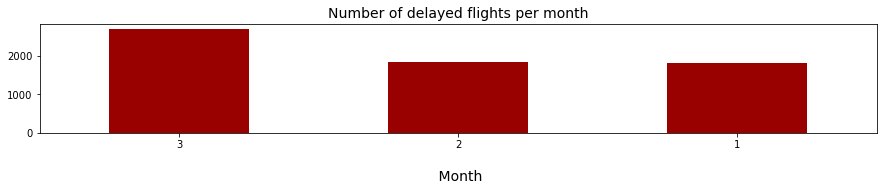

In [17]:
fig = plt.figure(1, figsize=(15,2))
df = dataset.groupby('Month').Status.sum().sort_values(ascending=False).plot.bar(color  = '#990000', rot = 0 , subplots=True)
plt.title('Number of delayed flights per month', fontsize= 14)
plt.xlabel('\n Month', fontsize = 14)
plt.show()

 **3 . In which day should fly?**
 
    Once we have found the month with the minimum number of delays in landings, it remains to be seen on which day it is
    worthwhile to fly in that month.

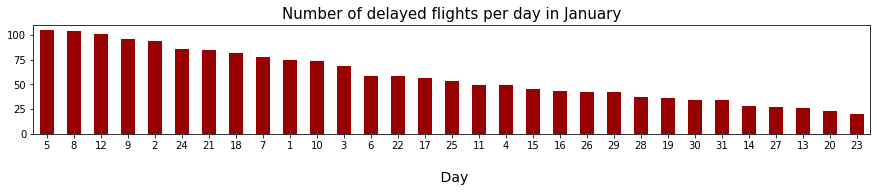

In [18]:
fig = plt.figure(1, figsize=(15,2))
df = dataset[dataset['Month'] == 1]
df = df.groupby('Day').Status.sum().sort_values(ascending=False).plot.bar(color  = '#990000', rot = 0 , subplots=True)
plt.title('Number of delayed flights per day in January', fontsize= 15)
plt.xlabel('\n Day', fontsize = 14)
plt.show()

 **4 . Does a delay in departure effects on delay in Arrival?**
 
    For this question, I used a diagram that illustrates the differences between flight delays on departure and flight delays
    on arrival according to Virgin America.

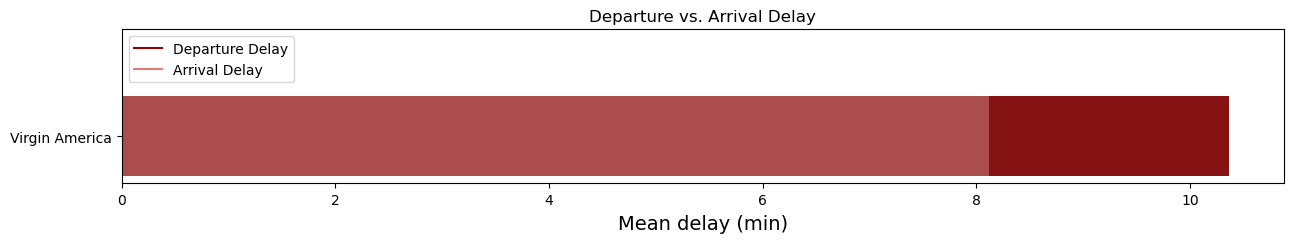

In [19]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 0.5

fig = plt.figure(1, figsize=(15,2))
ax = sns.barplot(x = "Departure Delay", y = "Airline", data = dataset, color= "#990000" , ci = None )
ax = sns.barplot(x = "Arrival Delay", y= "Airline" , data = dataset , color= "#de7c7c", alpha = 0.5, ci=None)
ax.yaxis.label.set_visible(False)
plt.plot(-1 , label = "Departure Delay" , color = '#990000')
plt.plot(-1 , label = "Arrival Delay" , color = '#de7c7c')
plt.title('Departure vs. Arrival Delay')
plt.legend(loc="upper left")
plt.xlabel('Mean delay (min)', fontsize=14, labelpad = 5);

    As can be seen from the diagram above, the number of delays in departure delay is much greater
    than the number of delays in landings, it can be concluded that the alirline reduces airtime for flights that have delayed 
    on their departure to get on time.